In [ ]:
# Author: Anil Osman TUR

In [18]:
# Necessary libraries
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = 8, 6

The header file is a bit too compact to process opening some of the info will give us flexibility

In [19]:
def header_info_extractor(data_header):
    ''' 
    data_header: pandas dataframe of loaded csv file which describes the images
    '''
    image_files = list(data_header['IMAGE_FILENAME'].values)
    labels = data_header['LABEL'].values.astype(str)
    label_set = sorted(list(set(labels)))
    
    new_data_block = []
    for row in zip(image_files, labels):
        file_name = row[0].split('_')
        new_data_block.append(file_name[1:-1] + [row[1]])    
    new_data_block = np.array(new_data_block)
    
    # chaning labels to numbers can help data processing
    for i, x in enumerate(label_set):
        new_data_block[new_data_block[:,-1] == x,-1] = i
    new_data_block = new_data_block.astype(np.int)
    return new_data_block, image_files, label_set

In [20]:
# testing the function
data_header = pd.read_csv('../data/gicsd_labels.csv', sep=', ', engine='python')
new_data_block, image_files, classes = header_info_extractor(data_header)

From the information we learned, we can only use the blue channel. This will generate single-channel image

In [21]:
def load_image(image_file):
    '''
    image_file: file name of the image in dataset
    return: blue channel of the loaded image
    '''
    file_path = os.path.join('../data','images', image_file)
    image_bgr = cv2.imread(file_path)
    return image_bgr[:,:,0]

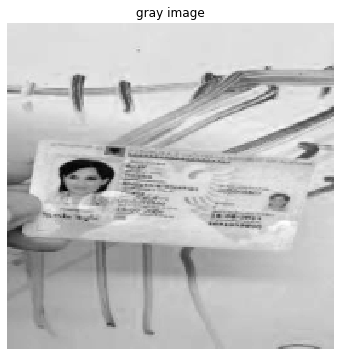

In [22]:
# testing the function
gray_image = load_image(image_files[10])
plt.imshow(gray_image, cmap='gray'); plt.title('gray image'); plt.axis('off');

To load images, I will use the pytorch's dataset structure. Because it's easy to use and understand. Adding the already written funtions in the class will give us prettier interface for using the dataset. 

In [26]:
class CardImageDataset():
    def __init__(self, root_dir='../data', header_file='gicsd_labels.csv', image_dir='images'):
        '''
        root_dir: location of the dataset dir
        header_file: location of the dataset header in the dataset directory
        image_dir: location of the images
        '''
        header_path = os.path.join(root_dir,header_file)
        self.data_header = pd.read_csv(header_path, sep=', ', engine='python')
        self.image_dir = os.path.join(root_dir,image_dir)
        
        self.header_info, self.image_files, self.classes = self.header_info_extractor()
        self.length = len(self.image_files)
        
    def __len__(self):
        return self.length
        
    def __getitem__(self, idx):
        gray_image = self.load_image(self.image_files[idx])
        label = self.header_info[idx,-1]
        return {'image': gray_image, 'label': label}    
        
    def load_image(self, image_file):
        '''
        image_file: file name of the image in dataset
        return: blue channel of the loaded image
        '''
        file_path = os.path.join(self.image_dir, image_file)
        image_bgr = cv2.imread(file_path)
        return image_bgr[:,:,0]
    
    def header_info_extractor(self):
        ''' 
        data_header: pandas dataframe of loaded csv file which describes the images
        '''
        image_files = list(self.data_header['IMAGE_FILENAME'].values)
        labels = self.data_header['LABEL'].values.astype(str)
        label_set = sorted(list(set(labels)))

        new_data_block = []
        for row in zip(image_files, labels):
            file_name = row[0].split('_')
            new_data_block.append(file_name[1:-1] + [row[1]])    
        new_data_block = np.array(new_data_block)

        # chaning labels to numbers can help data processing
        for i, x in enumerate(label_set):
            new_data_block[new_data_block[:,-1] == x,-1] = i
        new_data_block = new_data_block.astype(np.int)
        return new_data_block, image_files, label_set

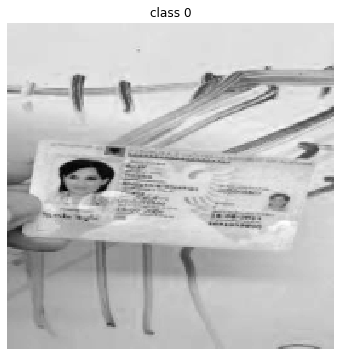

In [29]:
# testing the class
dataset = CardImageDataset(root_dir='../data', header_file='gicsd_labels.csv', image_dir='images')
print('dataset length: ', len(dataset))
plt.imshow(dataset[10]['image'], cmap='gray'); plt.title('class {}'.format(dataset[10]['label'])); plt.axis('off');